In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD


In [3]:
! pip install pandas 

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
Xl, Yl, Yt, Xt = {}, {}, {}, {}
for i in range(1,5):
    Xl[i] = pd.read_csv('tmp/Xl{}.csv'.format(i), index_col=0)
    Yl[i] = pd.read_csv('tmp/Yl{}.csv'.format(i), index_col=0)
    Xt[i] = pd.read_csv('tmp/Xt{}.csv'.format(i), index_col=0)
    Yt[i] = pd.read_csv('tmp/Yt{}.csv'.format(i), index_col=0)

In [14]:
Xl[1]

,0,1,2,3,4,5,6,7,8,9,10
24,0.933013,0.75,0.801938,0.099031,0.600779,0.989739,1.000000,0.500000,0.003534,0.000000,0.076786
25,0.933013,0.75,0.801938,0.099031,0.600779,0.989739,0.982963,0.629410,0.021261,0.000000,0.053571
26,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.933013,0.750000,0.069631,0.000000,0.048214
27,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.853553,0.853553,0.135129,0.000000,0.041071
28,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.750000,0.933013,0.208398,0.000000,0.035714
...,...,...,...,...,...,...,...,...,...,...,...
17515,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.629410,0.017037,0.287977,0.333333,0.346429
17516,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.750000,0.066987,0.212270,0.333333,0.341071
17517,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.853553,0.146447,0.138721,0.333333,0.335714
17518,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.933013,0.250000,0.072481,0.333333,0.330357


In [15]:
#import joblib
#joblib.load('tmp/scalerX')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

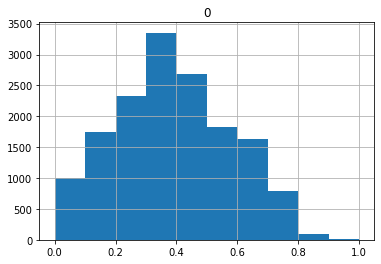

In [19]:
Yl[1].hist()

<AxesSubplot:>

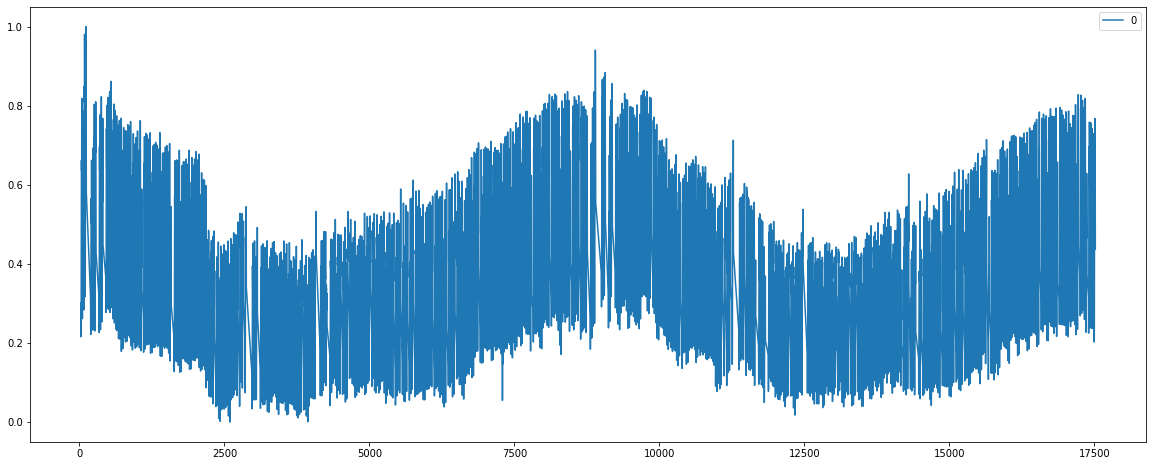

In [26]:

Yl[1].plot(figsize=[20,8])

<AxesSubplot:>

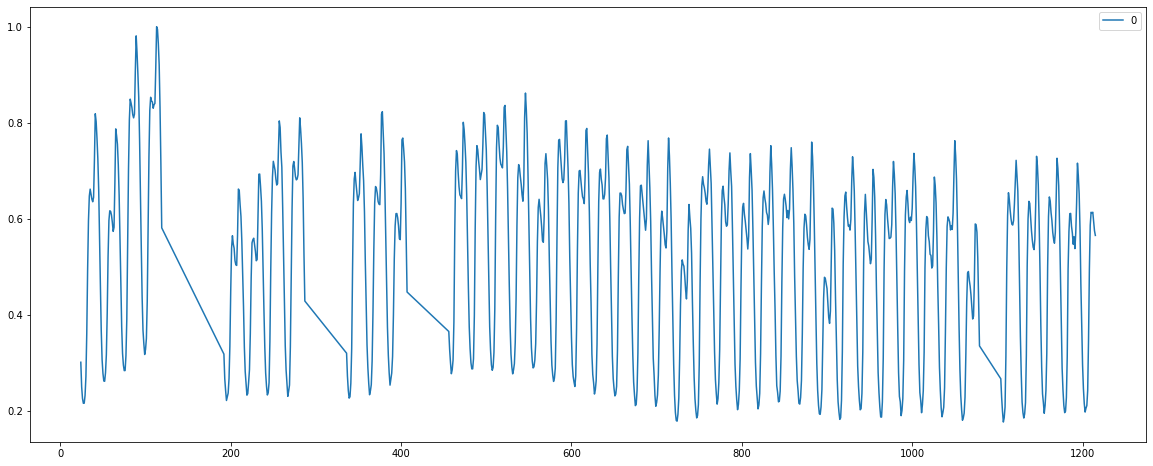

In [48]:

Yl[1].iloc[:1000].plot(figsize=[20,8])

<AxesSubplot:>

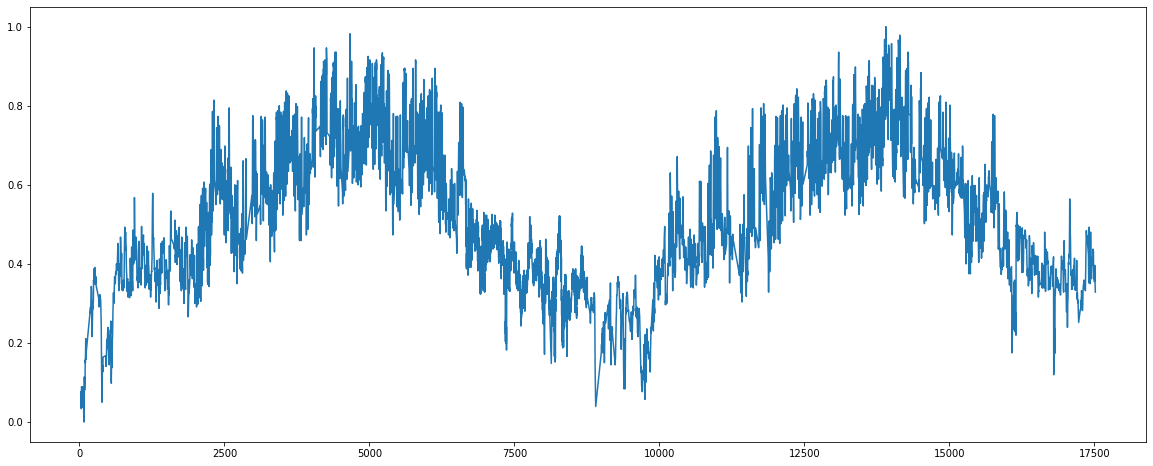

In [33]:
Xl[1].iloc[:,-1].plot(figsize=[20,8])

<AxesSubplot:>

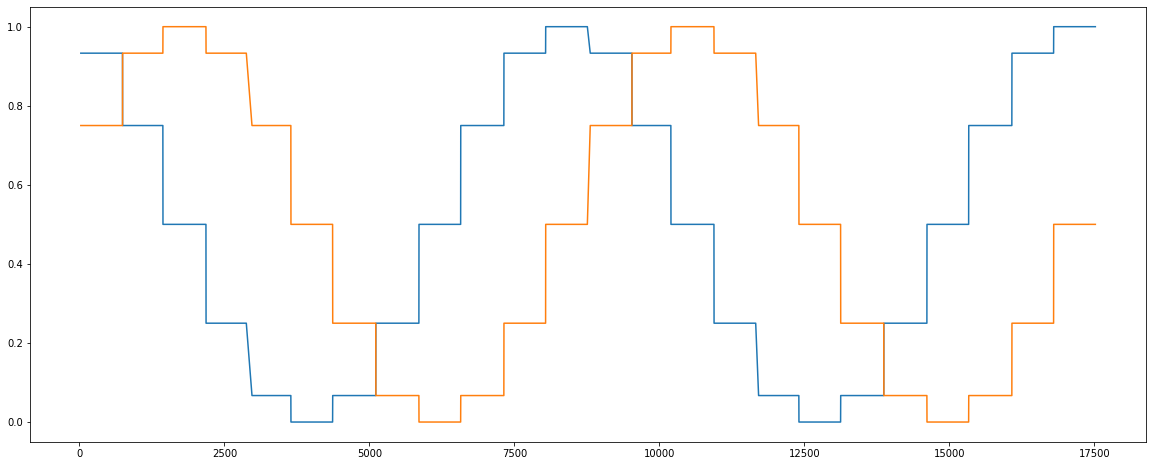

In [57]:
Xl[1].iloc[:,0].plot(figsize=[20,8])
Xl[1].iloc[:,1].plot(figsize=[20,8])

<AxesSubplot:>

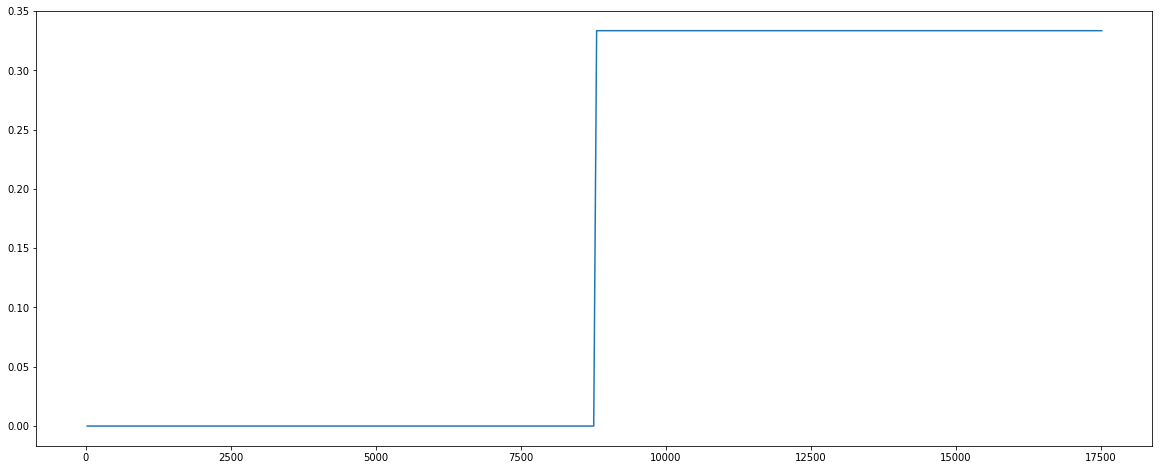

In [66]:
Xl[1].iloc[:,9].plot(figsize=[20,8])
#Xl[1].iloc[:1000,9].plot(figsize=[20,8])

In [96]:
model = Sequential()
model.add(Dense(30, input_dim = 11, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(12, activation='relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer = 'he_uniform'))
model.compile(loss='mean_squared_error', optimizer = SGD(lr=0.01, momentum = 0.9))


In [97]:
history = model.fit(Xl[1],Yl[1], validation_data=(Xt[1],Yt[1]), epochs=20)

Epoch 1/20
483/483 [==============================] - 1s 2ms/step - loss: 0.0162 - val_loss: 0.0116
Epoch 2/20
483/483 [==============================] - 1s 1ms/step - loss: 0.0085 - val_loss: 0.0094
Epoch 3/20
483/483 [==============================] - 1s 1ms/step - loss: 0.0071 - val_loss: 0.0082
Epoch 4/20
483/483 [==============================] - 1s 1ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 5/20
483/483 [==============================] - 1s 1ms/step - loss: 0.0048 - val_loss: 0.0062
Epoch 6/20
483/483 [==============================] - 1s 1ms/step - loss: 0.0043 - val_loss: 0.0059
Epoch 7/20
483/483 [==============================] - 1s 1ms/step - loss: 0.0039 - val_loss: 0.0057
Epoch 8/20
483/483 [==============================] - 1s 1ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 9/20
483/483 [==============================] - 1s 2ms/step - loss: 0.0036 - val_loss: 0.0055
Epoch 10/20
483/483 [==============================] - 1s 2ms/step - loss: 0.0034 - val_loss: 0.0050

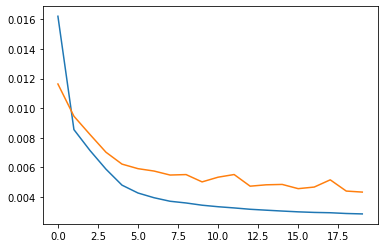

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

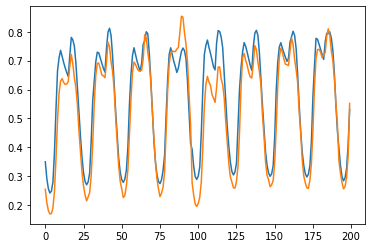

In [84]:
plt.plot(model.predict(Xt[1])[:200])
plt.plot(Yt[1].to_numpy()[:200])

In [80]:
Xl[1]

,0,1,2,3,4,5,6,7,8,9,10
24,0.933013,0.75,0.801938,0.099031,0.600779,0.989739,1.000000,0.500000,0.003534,0.000000,0.076786
25,0.933013,0.75,0.801938,0.099031,0.600779,0.989739,0.982963,0.629410,0.021261,0.000000,0.053571
26,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.933013,0.750000,0.069631,0.000000,0.048214
27,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.853553,0.853553,0.135129,0.000000,0.041071
28,0.933013,0.75,0.801938,0.099031,0.697431,0.959375,0.750000,0.933013,0.208398,0.000000,0.035714
...,...,...,...,...,...,...,...,...,...,...,...
17515,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.629410,0.017037,0.287977,0.333333,0.346429
17516,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.750000,0.066987,0.212270,0.333333,0.341071
17517,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.853553,0.146447,0.138721,0.333333,0.335714
17518,1.000000,0.50,0.801938,0.099031,0.399221,0.989739,0.933013,0.250000,0.072481,0.333333,0.330357


In [81]:
Yl[1] 

,0
24,0.301218
25,0.250177
26,0.225706
27,0.215804
28,0.215990
...,...
17515,0.720571
17516,0.680267
17517,0.617720
17518,0.519913


# Homework

You have received notebooks with a neural network code, and normalized input data (there is also a file that allows you to reverse the normalization if you want).
Run the scripts, analyze what is going on in them and check if we all get similar results.

Do experiments with ANN for forecasting electricity consumption using data as above. Choose 3 experiments you will do from the list below, or plan your own experiment:

- Change solver used to oher than SGD (eg. model.compile(optimizer= ’adam’)) and comapre results. 
- Check the calculation error using cross-validation. Compare with model accuracy calculated without cross-validation.
- Experiment with different network structure.
- Experiment with reduced numer of inputs.
- Compare speed of calculation using CPU and GPU 


Results: pdf report
Plot accuracy history when the model was taught. 
Show results like time of calculation, final loss function value, plots of forecasts for different experiments. 
Show ANN architecture used (may be screenshot from notebook). 

Deadline: May 26th